In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# F&B Revenue Forecast Model

## Data

In [2]:
#Loading the raw data

df_2016 = pd.read_csv("raw_data/orders2016.csv", sep=";")
df_2017 = pd.read_csv("raw_data/orders2017.csv", sep=";")
df_2018 = pd.read_csv("raw_data/orders2018.csv", sep=";")
df_2019 = pd.read_csv("raw_data/orders2019.csv", sep=";")
df_2020 = pd.read_csv("raw_data/orders2020.csv", sep=";")
df_2021 = pd.read_csv("raw_data/orders2021.csv", sep=";")
df_2022 = pd.read_csv("raw_data/orders2022.csv", sep=";")

df_list = [df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022]

In [3]:
df_2018.head()

,id,date,time,quantity,item_id,item_name,item_plu,item_price,expense_item,cancelled,...,device_name,device_number,device_id,table_name,table_id,tab_name,tab_id,party_name,party_number,party_id
0,689E8A27-629F-43C4-B458-251F245F5A8E,2018-04-22,14:01:47,1,6742FD21-98EF-4543-AD03-D615DD32741F,Waffle + A WHITE CHOCO,0,740,0,0,...,iPad,1,A7BAF1FB-C744-42BB-9421-9016398B6356,Theke,8189E65F-0D1D-4830-9A9A-5EDC54E0DF47,Theke,000008A2-13BE-40B3-A1A6-9C054D4FF5B9,Partei 1,0,825E8016-9802-4A69-A25B-3F95C27D1280
1,05AB42CE-0ED7-423A-A241-C7D0D412B082,2018-04-21,15:21:28,1,A1A8AB5A-AE65-4EB6-B52E-71813E7C97DF,C Classic CHOCOLATE,0,390,0,0,...,iPad,1,A7BAF1FB-C744-42BB-9421-9016398B6356,Theke,8189E65F-0D1D-4830-9A9A-5EDC54E0DF47,Theke,0002678D-1635-4CCC-B2EF-3536C931EA23,Partei 1,0,28D2D25E-E573-476B-8A0D-A15A5C6BBEFC
2,D889B52F-B5BC-4DBE-BA15-38DF81465708,2018-05-05,16:35:49,1,54710C6E-662B-45FE-8874-1EBD27BC5CBF,A Classic VANILLA,0,440,0,0,...,iPad,1,A7BAF1FB-C744-42BB-9421-9016398B6356,Theke,8189E65F-0D1D-4830-9A9A-5EDC54E0DF47,Theke,0003CFB9-B99A-4D1F-ADF8-BA783942A3C1,Partei 1,0,1A181490-FBA6-4DC8-9D80-3C4883FD97EB
3,BDA43D01-74EA-48A4-BD5C-C4D6CDDB679C,2018-05-05,16:35:49,1,ED12F302-549B-436D-A19A-A60D74D46F5F,B Classic CHOCOLATE,0,440,0,0,...,iPad,1,A7BAF1FB-C744-42BB-9421-9016398B6356,Theke,8189E65F-0D1D-4830-9A9A-5EDC54E0DF47,Theke,0003CFB9-B99A-4D1F-ADF8-BA783942A3C1,Partei 1,0,1A181490-FBA6-4DC8-9D80-3C4883FD97EB
4,3736E95B-CC65-4B9A-BC0C-ADFFA9D18950,2018-05-05,16:35:49,1,F2162A86-15D4-49CC-943E-9071CC7BC786,D Classic RASPBERRY,0,390,0,0,...,iPad,1,A7BAF1FB-C744-42BB-9421-9016398B6356,Theke,8189E65F-0D1D-4830-9A9A-5EDC54E0DF47,Theke,0003CFB9-B99A-4D1F-ADF8-BA783942A3C1,Partei 1,0,1A181490-FBA6-4DC8-9D80-3C4883FD97EB


In [4]:
#Dropping unnecessary columns, grouping by "date", summing "item_price" to get daily revenues

for i, df in enumerate(df_list):
    df_list[i] = pd.DataFrame(df.groupby(by="date")["item_price"].sum()/100)

In [5]:
#Concat all data in one dataframe, rename the columns for prophet

df = pd.concat(df_list, ignore_index=False)
df = df.rename(columns={"date": "ds", "item_price": "y"})
df["ds"] = df.index
df = df.reset_index(drop=True)
df = df[["ds","y"]]
df

,ds,y
0,2016-09-01,365.9
1,2016-09-02,358.6
2,2016-09-03,487.5
3,2016-09-04,90.9
4,2016-09-05,125.0
...,...,...
1729,2022-11-18,78.5
1730,2022-11-19,287.3
1731,2022-11-20,125.8
1732,2022-11-21,1.5


In [6]:
df['ds']=pd.to_datetime(df['ds'])

In [7]:
#Dropping outliers 
df_cleaned = df[df["y"] > 60]
df_cleaned = df_cleaned[df["y"] < 2200]

/tmp/ipykernel_1108/3521371475.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[df["y"] < 2200]


In [8]:
df_cleaned.describe()

,y
count,1700.000000
mean,670.460118
std,429.559342
min,61.000000
25%,337.175000
50%,577.000000
75%,926.050000
max,2180.600000


In [9]:
df_cleaned.head()

,ds,y
0,2016-09-01,365.9
1,2016-09-02,358.6
2,2016-09-03,487.5
3,2016-09-04,90.9
4,2016-09-05,125.0


In [10]:
#create csv with cleaned data
df_cleaned.to_csv("df_cleaned",index=False)

<Axes: xlabel='y', ylabel='Count'>

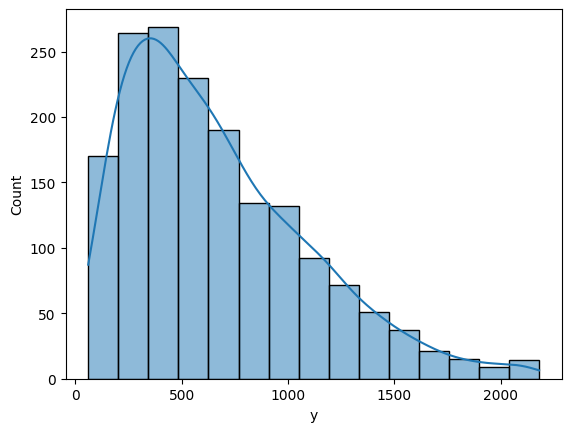

In [11]:
sns.histplot(data=df_cleaned["y"],kde=True,bins=15)

<Axes: xlabel='ds', ylabel='y'>

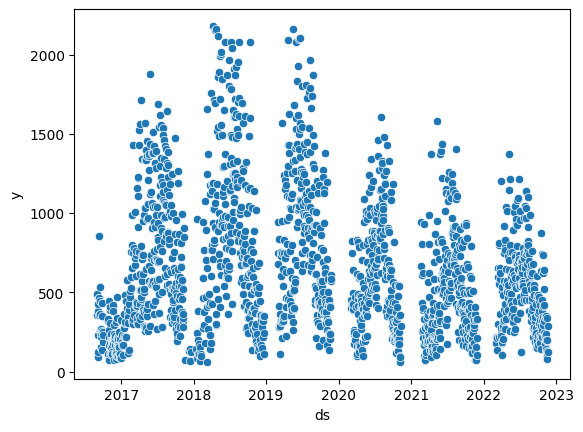

In [12]:
sns.scatterplot(x=df_cleaned["ds"],y=df["y"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd3bed52b90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd3bed530d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd3bed51960>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd3bed53610>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd3bed538b0>],
 'means': []}

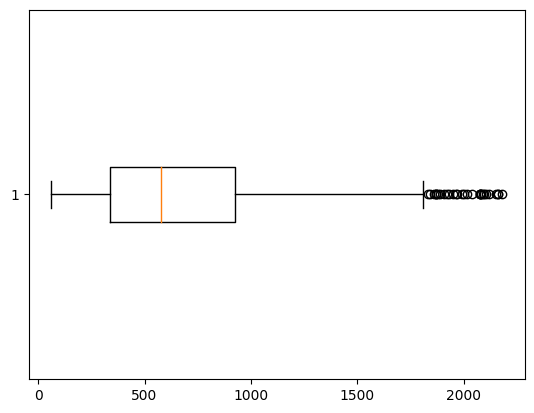

In [13]:
plt.boxplot(df_cleaned["y"],vert=False)